In [1]:
%config IPCompleter.use_jedi = False
%config Completer.evaluation = 'limited'
import warnings
warnings.filterwarnings('ignore')

<h2> Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

<h2> Importing the Data

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<h2> Let's Plot a scatter plot to see the distribution

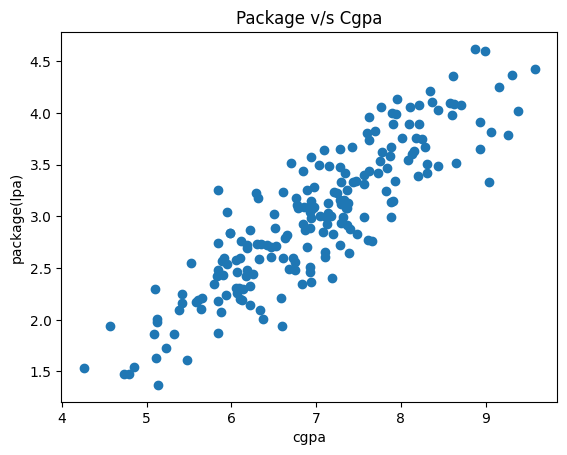

In [6]:
plt.scatter(x = df['cgpa'] , y = df['package'])

plt.title('Package v/s Cgpa')
plt.xlabel('cgpa')
plt.ylabel('package(lpa)')

plt.show()

In [8]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


In [13]:
# split X(input column) and Y(target column)
X = df.iloc[ : , : 1]
y = df.iloc[ : , -1]

X 

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [14]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

<h2> Split the training set and test test

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

<h2> Import LinearRegression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Make a object of LinearRegression model 
linear_regression = LinearRegression()

In [20]:
# train the model using fit 
linear_regression.fit(X_train , y_train)

LinearRegression()

In [28]:
# so we created a model or the linear equation. y = mX + c. Let's check the value of m and c 
# here m is the slope also we can say cofficent , c is the y axis intersect

m = linear_regression.coef_
c = linear_regression.intercept_

print(f"m = {m}")
print(f"c = {c}")

m = [0.55795197]
c = -0.8961119222429144


In [23]:
# Let's make predictions

# Let's predict a single value. Our model is expeting 1 single with single col 
linear_regression.predict([[5]])

array([1.89364794])

In [24]:
# let's check the 2nd person from the test data 
linear_regression.predict(X_test.iloc[1].values.reshape(1 , 1))

array([3.09324469])

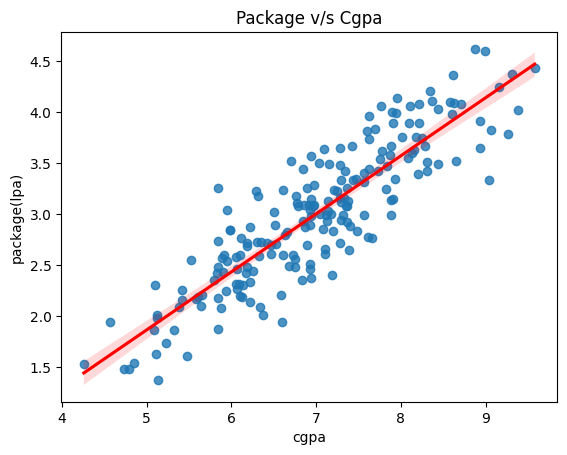

In [26]:
# Let's see the actual regression line 
import seaborn as sns 
	
sns.regplot(data = df , x = 'cgpa' , y = 'package' , line_kws = dict(color = 'r'))
plt.title('Package v/s Cgpa')
plt.xlabel('cgpa')
plt.ylabel('package(lpa)') 
plt.show()

<h2> Let's see the line what model made

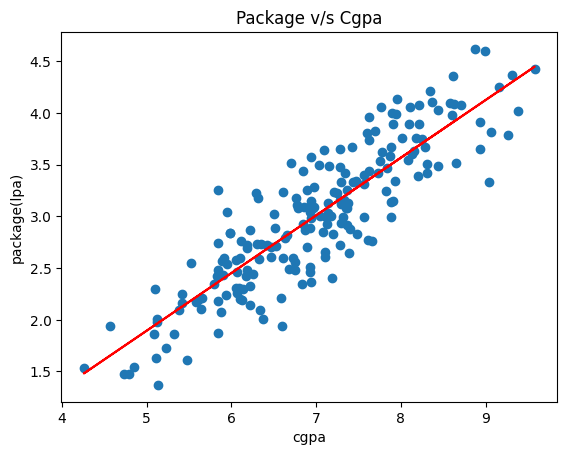

In [27]:
plt.scatter(x = df['cgpa'] , y = df['package'])
plt.plot(X_train , linear_regression.predict(X_train) , color = 'red')

plt.title('Package v/s Cgpa')
plt.xlabel('cgpa')
plt.ylabel('package(lpa)')
plt.show()

In [29]:
# Let's check a prediction mannually
# y = mx + c 
x_1 = 9.99
y_mannual = m * x_1 + c 
y_model = linear_regression.predict([[9.99]])

print(f"y_mannual = {y_mannual}")
print(f"y_model: {y_model}")

y_mannual = [4.67782829]
y_model: [4.67782829]
